In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")

%load_ext julia.magic

[*********************100%***********************]  2 of 2 completed
make_diff()
                ^GSPC       ^IXIC
Date                             
2021-01-04 -55.420166 -189.830078
2021-01-05  26.210205  120.509766
2021-01-06  21.279785  -78.169922
2021-01-07  55.650146  326.690430
2021-01-08  20.889893  134.500000
...               ...         ...
2022-03-23 -55.369629 -186.220703
2022-03-24  63.919922  269.240234
2022-03-25  22.899902  -22.540039
2022-03-28  -2.149902  185.600586
2022-03-29  90.369629  275.958984

[312 rows x 2 columns]
Initializing Julia interpreter. This may take some time...


Najpierw rozważamy dane jednowymiarowe

In [107]:
getter = Get_Data.Get_Data("^IXIC", start="1980-02-15", end="1990-02-15", interval="1d")
ixic_vec_norm = getter.make_diff()
ixic_vec_log = getter.make_log_diff()

make_diff()
make_diff()


In [108]:
ixic_vec_norm

Date
1980-02-15   -0.979996
1980-02-19   -1.500000
1980-02-20    1.040009
1980-02-21   -0.790009
1980-02-22   -1.229996
                ...   
1990-02-08    0.500000
1990-02-09    1.500000
1990-02-12   -2.399994
1990-02-13   -0.600006
1990-02-14    0.800018
Name: Close, Length: 2528, dtype: float64

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -12.31  |  Wartość krytyczna dla 5%: -2.8

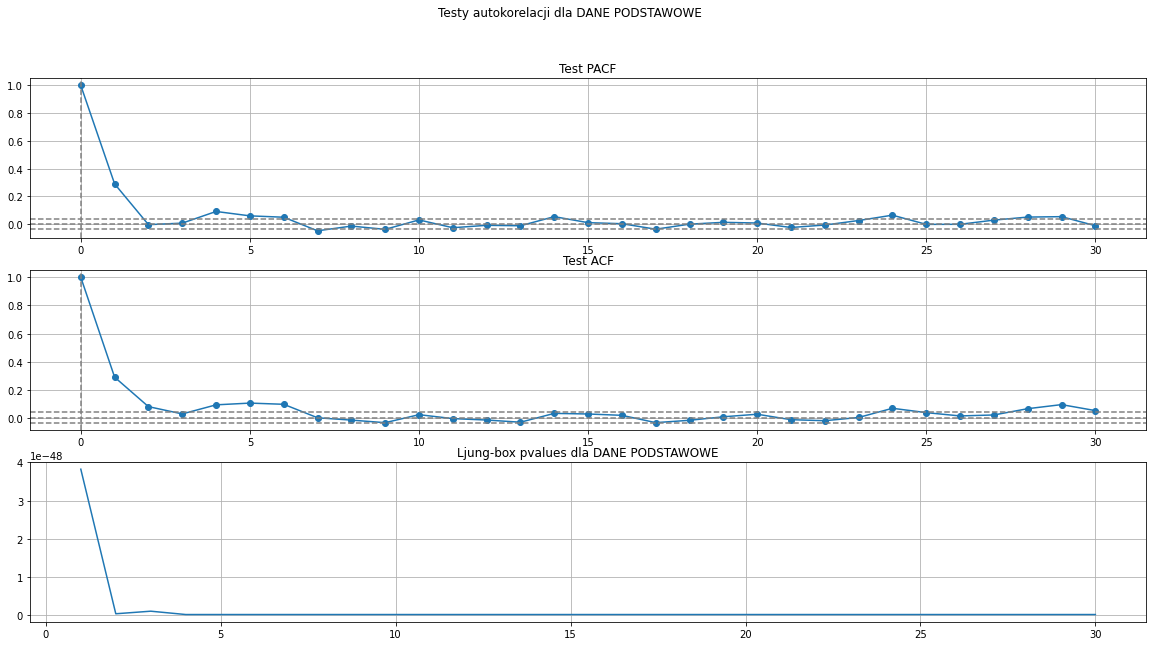

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  363645.54847959144


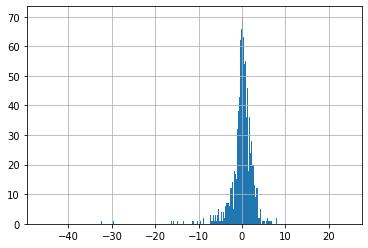

In [109]:
getter.analiza_statystyczna_szeregu(ixic_vec_norm)

analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -9.1  |  Wartość krytyczna dla 5%: -2.863

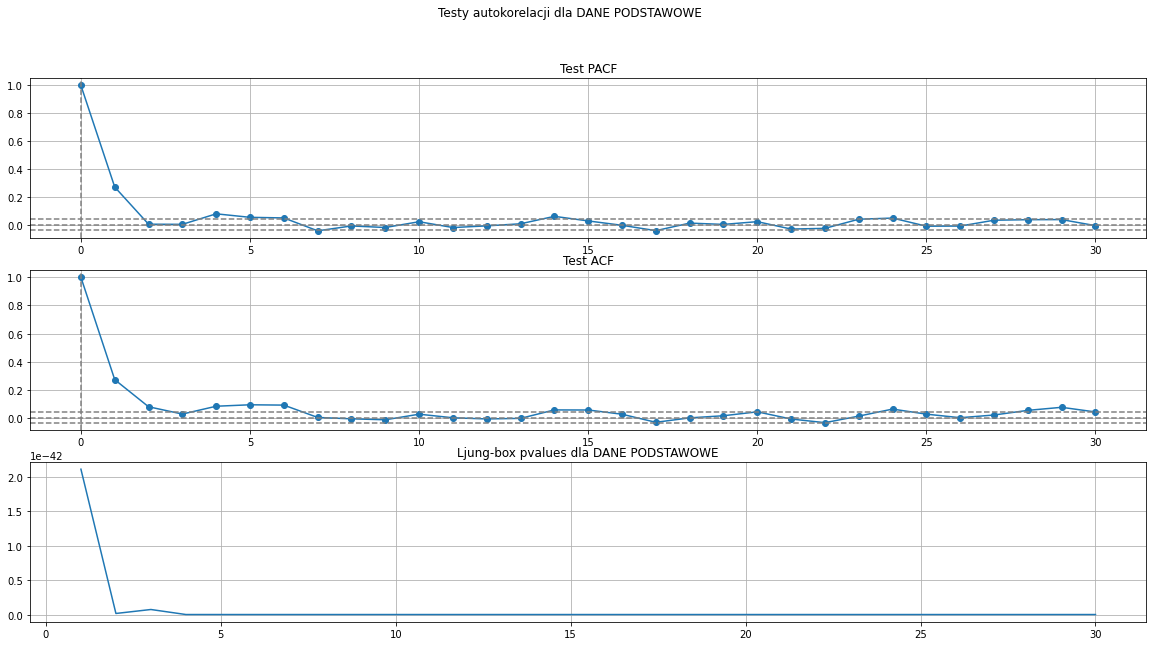

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  107801.31183151201


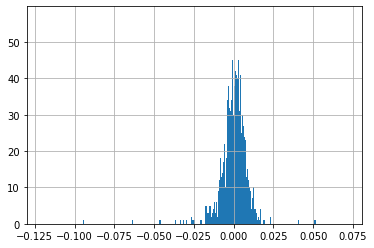

In [4]:
getter.analiza_statystyczna_szeregu(ixic_vec_log)

In [110]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = cart_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 20,
    "min_samples_split": 3,
    "min_samples_leaf": 3
})


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1586]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz    3791765            0      1558343     44106062       408640  ticks
       #2  4200 MHz    3194531            0       568968     45692671        18343  ticks
       #3  4200 MHz    4815125            0       888609     43752437        21656  ticks
       #4  4200 MHz    4060234            0       478468     44917468        12093  ticks
       #5  4200 MHz    4866734            0       735296     43854000        19796  ticks
       #6  4200 MHz    6948687            0       893890     41613453        16328  ticks
       #7  4200 MHz    5595203            0       776625     43084203        18375  ticks
       #8  4200 MHz    5423125            0       578781     43454125    

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll



2, 2, 3
2, 3, 2
2, 3, 3
3, 2, 2
3, 2, 3
3, 3, 2
3, 3, 3
4, 2, 2
4, 2, 3
4, 3, 2
4, 3, 3
5, 2, 2
5, 2, 3
5, 3, 2
5, 3, 3
6, 2, 2
6, 2, 3
6, 3, 2
6, 3, 3
7, 2, 2
7, 2, 3
7, 3, 2
7, 3, 3
8, 2, 2
8, 2, 3
8, 3, 2
8, 3, 3
9, 2, 2
9, 2, 3
9, 3, 2
9, 3, 3
10, 2, 2
10, 2, 3
10, 3, 2
10, 3, 3
11, 2, 2
11, 2, 3
11, 3, 2
11, 3, 3
12, 2, 2
12, 2, 3
12, 3, 2
12, 3, 3
13, 2, 2
13, 2, 3
13, 3, 2
13, 3, 3
14, 2, 2
14, 2, 3
14, 3, 2
14, 3, 3
15, 2, 2
15, 2, 3
15, 3, 2
15, 3, 3
16, 2, 2
16, 2, 3
16, 3, 2
16, 3, 3
17, 2, 2
17, 2, 3
17, 3, 2
17, 3, 3
18, 2, 2
18, 2, 3
18, 3, 2
18, 3, 3
19, 2, 2
19, 2, 3
19, 3, 2
19, 3, 3
20, 2, 2
20, 2, 3
20, 3, 2
20, 3, 3

In [112]:
cart_ar.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

{'max_depth': 10.0, 'min_samples_split': 2, 'min_samples_leaf': 2}
fit
{'max_depth': 10.0, 'min_samples_split': 2, 'min_samples_leaf': 2}
fit


forecast_raw
forecast_raw
forecast_raw
SUMA:  429  /  759


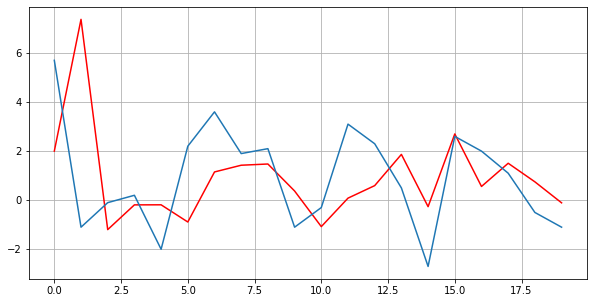

In [114]:
plt.figure(figsize=(10,5))
plt.plot(cart_ar.forecast_raw()[:20], c='r')
plt.plot(cart_ar.data_test[:20].values)

plt.grid()

print("SUMA: ",sum(cart_ar.data_test.values * cart_ar.forecast_raw() > 0), " / ", len(cart_ar.forecast_raw()))

Analiza statystyczna reszt:

Date
1987-02-17    3.700012
1987-02-18   -8.470016
1987-02-19    1.098742
1987-02-20    0.390453
1987-02-23   -1.811999
                ...   
1990-02-08   -0.262637
1990-02-09    1.026588
1990-02-12   -2.877464
1990-02-13   -0.260818
1990-02-14    0.410437
Name: Close, Length: 759, dtype: float64
analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
------------------------------------------------------------------------------

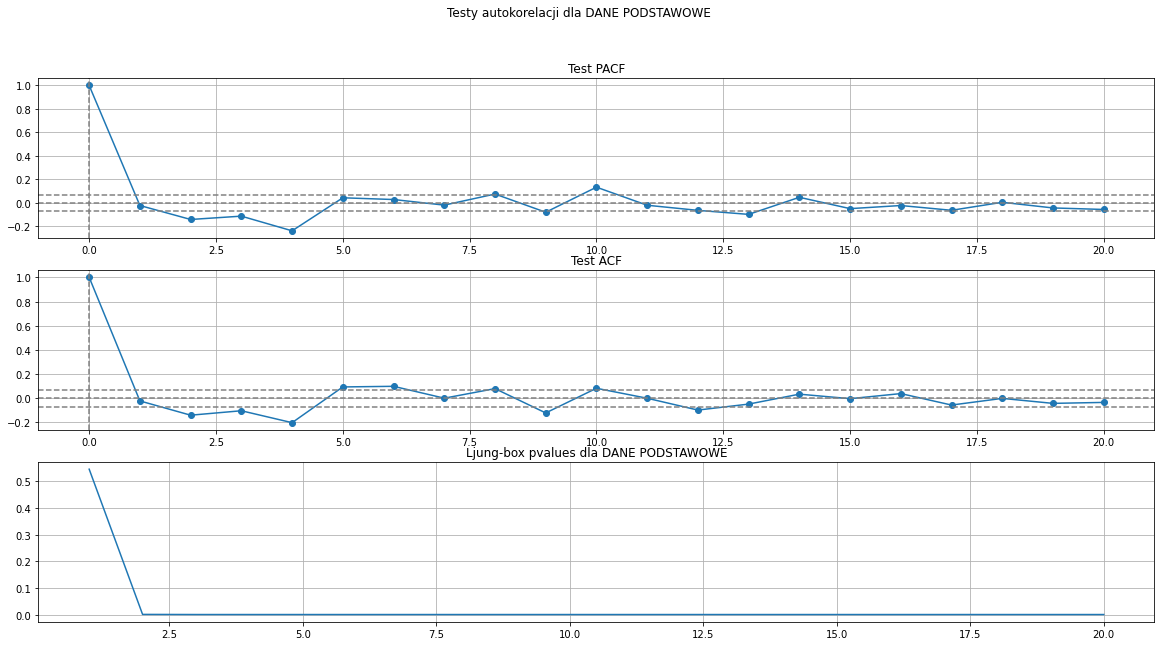

Pvalue testu Jarque-Bera:  0.0
Statystyka testu Jarque-Bera:  58601.22301019434


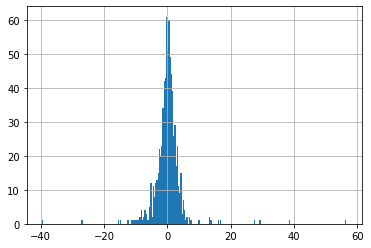

In [8]:
print(cart_ar.errors)
getter.analiza_statystyczna_szeregu(cart_ar.errors, max_lag=20)

Random Forest:

In [9]:
rf_ar = RF_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = rf_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 10,
    "max_n_estimators": 10,
    "min_samples_split": 3,
    "min_samples_leaf": 3
})

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1586]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz    3174265            0      1367640     42337687       371781  ticks
       #2  4200 MHz    2661078            0       471781     43746734        15375  ticks
       #3  4200 MHz    4107875            0       771046     42000671        19703  ticks
       #4  4200 MHz    3361859            0       382156     43135578        10328  ticks
       #5  4200 MHz    4081578            0       621781     42176093        17109  ticks
       #6  4200 MHz    6048796            0       769921     40060734        14171  ticks
       #7  4200 MHz    4658312            0       660687     41560453        16343  ticks
       #8  4200 MHz    4485265            0       478421     41915765     


KeyboardInterrupt



In [ ]:
rf_ar.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "max_n_estimators": int(opt["max_n_estimators"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.plot(rf_ar.forecast_raw(), c='r')
plt.plot(rf_ar.data_test.values)
plt.grid()

print("SUMA: ",sum(rf_ar.data_test.values * rf_ar.forecast_raw() > 0), " / ", len(rf_ar.forecast_raw()))

In [ ]:
print(rf_ar.errors)
getter.analiza_statystyczna_szeregu(rf_ar.errors, max_lag=20)

In [ ]:
knn_ar = KNN_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = knn_ar.cross_validation_rolling_window(dlugosc_okna=1/2, params={"k_max":40,
                                                                       "weights":['uniform', 'distance'],
                                                                       "p":[1, 2]
                                                                      })

print(opt)
knn_ar.fit(params_fit={"k": opt["k_max"],
                        "weights": opt["weights"],
                        "p": opt["p"]})

plt.plot(knn_ar.forecast_raw(), c='r')
plt.plot(knn_ar.data_test.values)
plt.axhline(0)
plt.grid()

print("SUMA: ",sum(knn_ar.data_test.values * knn_ar.forecast_raw() > 0), " / ", len(knn_ar.forecast_raw()))

Modele wielowymiarowe w reprezentacji ARX

In [ ]:
szereg_norm = Get_Vectorised_Data.Get_Vectorised_Data(["CL=F", "^IXIC", "^GSPC", "GC=F"], start="2010-09-20", end='2022-01-20', interval="1d").make_diff()
szereg_log = Get_Vectorised_Data.Get_Vectorised_Data(["CL=F", "^IXIC", "^GSPC", "GC=F"], start="2020-09-20", end='2022-01-20', interval="1d").make_log_diff()


szereg_norm.dropna(how='any', inplace=True)
szereg_log.dropna(how='any', inplace=True)

szereg_norm

In [ ]:
getter.analiza_statystyczna_szeregu(szereg_norm["^IXIC"])

In [ ]:
getter.analiza_statystyczna_szeregu(szereg_log["^IXIC"])

Nie ma zauważalnych różnic statystycznych, więc zostajemy przy zwrotach normalnych. Zacznijmy od reprezentacji CART:

In [ ]:
cart_arx = CART_ARX(data=szereg_norm, params={"lags": 1}, test_ratio=0.7, to_predict="^IXIC")

opt = cart_arx.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 10,
    "min_samples_split": 10,
    "min_samples_leaf": 10
})

In [ ]:
cart_arx.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.plot(cart_arx.forecast_raw(), c='r')
plt.plot(cart_arx.data_test["^IXIC"].values)
plt.grid()

print("SUMA: ",sum(cart_arx.data_test["^IXIC"].values * cart_arx.forecast_raw() > 0), " / ", len(cart_arx.forecast_raw()))

In [ ]:
getter.analiza_statystyczna_szeregu(cart_arx.errors, max_lag=15)

In [ ]:
rf_arx = RF_ARX(data=szereg_norm, params={"lags": 1}, test_ratio=0.7, to_predict="^IXIC")

opt = rf_arx.cross_validation_rolling_window_julia(dlugosc_okna=1/2, params = {
    "max_depth": 10,
    "min_samples_split": 10,
    "max_n_estimators": 3,
    "min_samples_leaf": 3
})

In [ ]:
rf_arx.fit(params_fit={"max_depth":opt["depth"],
                       "min_samples_split":int(opt["min_samples_split"]),
                       "max_n_estimators": int(opt["max_n_estimators"]),
                       "min_samples_leaf":int(opt["min_samples_leaf"])})

plt.plot(rf_arx.forecast_raw(), c='r')
plt.plot(rf_arx.data_test["^IXIC"].values)
plt.grid()

print("SUMA: ",sum(rf_arx.data_test["^IXIC"].values * rf_arx.forecast_raw() > 0), " / ", len(rf_arx.forecast_raw()))

In [ ]:
getter.analiza_statystyczna_szeregu(rf_arx.errors, max_lag=15)

Reprezentacja KNN

In [ ]:
knn_arx = KNN_ARX(data=szereg_norm, params={"lags": 1,}, test_ratio=0.7, to_predict="^IXIC")

opt = knn_arx.cross_validation_rolling_window(dlugosc_okna=1/2, params = {"k_max": 20,
                                                                         "weights": ["uniform", "distance"],
                                                                         "p": [1, 2]})

In [ ]:
knn_arx.fit(params_fit={
    "k": opt["k_max"],
    "p": opt['p'],
    'weights': opt["weights"]
})

plt.figure(figsize=(20, 10))
plt.plot(knn_arx.data_test["^IXIC"].values)
plt.plot(knn_arx.forecast_raw(), c='r')
plt.grid()

print("SUMA: ",sum(knn_arx.data_test["^IXIC"].values * knn_arx.forecast_raw() > 0), " / ", len(knn_arx.forecast_raw()))

In [ ]:
getter.analiza_statystyczna_szeregu(knn_arx.errors, max_lag=15)